#  Clustering without Dimensionality Reduction
## K-Means

In this notebook, you will implement k-means clustering without dimensionality reduction. In general, you will learn how to:

* Implement the k-means clustering algorithms using scikit learn library (without any form of dimensionality reduction);

* Implement the k-means clustering algorithms from scratch (without any form of dimensionality reduction).

In particular, you will be asked to to:
* Implement function 'Euclidean_dist';
* Implement function 'calc_label';
* Implement function 'cost_func';
* Implement function 'update_center';
* Implement function 'kmeansNewPredict';

# Import libraries

First of all, import the libraries you need to use in this notebook. Specifically, the built-in function for K-means algorithm, named 'KMeans', is under library 'sklearn'.

In [1]:
# import libraries
import pickle
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Load the data
For the clustering tasks we will use the dataset generating from isotropic Gaussian blobs for clustering. Specifically, we will generate 3000 gaussian datapoints in 2-D space. They come from 3 clusters.

In [2]:
X, y, true_centers = make_blobs(n_samples=3000, centers=3, n_features=2, return_centers=True,
                      random_state=0)


dataset shape: (3000, 2)
one of the data: [2.04934012 2.26372373], its cluster center is [2.05526752 0.89766366]
true center is: 
[[ 0.97627008  4.30378733]
 [ 2.05526752  0.89766366]
 [-1.52690401  2.91788226]]


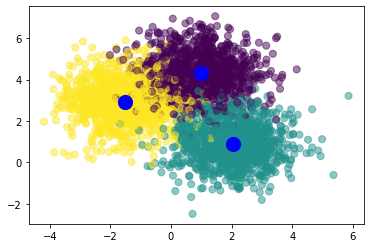

In [3]:
# visualise the data
print(f"dataset shape: {X.shape}")
print(f"one of the data: {X[0,:]}, its cluster center is {true_centers[y[0]]}")
print(f"true center is: ")
print(true_centers)
#  plot datapoints according to their cluster labels
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, alpha=0.5, cmap='viridis')

#  plot true cluster centers using color 'blue'
plt.scatter(true_centers[:, 0], true_centers[:, 1], c='blue', s=200);

# Use K-means clustering from a library

We will first see how k-means can be implemented using built-in functions from the scikit-learn library.

In [4]:
# sklearn functions implementation
def kmeansPredict(X, k):
    '''
    Inputs
        X: dataset;
        k: number of clusters.
        
    Return
        y_kmeans: predicted cluster label;
        centers: cluster centers.
    '''
    
    # the bulit-in function for K-means,
    # where n_clusters is the number of clusters.
    kmeans = KMeans(n_clusters=k)
    
    # fit the algorithm with dataset
    kmeans.fit(X)
    
    # predict after fit
    y_kmeans = kmeans.predict(X)
    
    # get the centers after fit
    centers = kmeans.cluster_centers_
    
    return y_kmeans, centers

# run K-means for different values of k, which is 3 in following case
k1 = 3
y_predict, centers = kmeansPredict(X,k1)

## visualisation
Now, we will visualise the results, which you can compare with ground truth shown above.

The cluster center for the first datapoint is : [1.98416191 0.8946104 ]
The centers for the 3 clusters are : 
[[ 1.98416191  0.8946104 ]
 [-1.58101681  2.91388238]
 [ 0.99064705  4.36549792]]


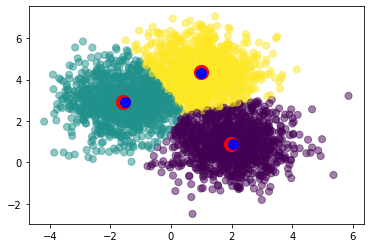

In [5]:
# visualise the result of k-means
print(f"The cluster center for the first datapoint is : {centers[y_predict[0]]}")
print(f"The centers for the {k1} clusters are : ")
print(centers)


#  plot datapoints according to their cluster labels
plt.scatter(X[:, 0], X[:, 1], c=y_predict, s=50, alpha=0.5, cmap='viridis')

#  plot estimate cluster centers using color 'red'
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200);

#  plot true cluster centers using color 'blue'
plt.scatter(true_centers[:, 0], true_centers[:, 1], c='blue', s=100);

# Implement you own K-means clustering function 

In this part, you need to complete the code, which will implement the K-means algorithm from scratch.

## Euclidean Distance
First of all, you need to define a function that returns the sqaured Euclidean distance between two datapoints $\boldsymbol{a}$ and $\boldsymbol{b}$,
\begin{align}
d(\boldsymbol{a,b})=\sum_{i}{(a_{i}-b_{i})^2}
\end{align}

In [6]:
# Euclidean Distance Caculator
def Euclidean_dist(a, b):
    '''
    Input
        a,b : 2 datapoints in vector form, the euclidean distance of which will be returned.
    '''
    # Complete code below.
    euc_dist = ...
    return euc_dist

# test the function with two data [0,0] and [3,4]
test_data1=np.array([0,0])
test_data2=np.array([3,4])
dist=Euclidean_dist(test_data1,test_data2)
# you should see an output: 25
print(dist)

25


## Labels
Now, we need to implement the function that will return the cluster label of data given cluster centers. Recall that the label calculation is
\begin{align}
label= arg\min_{k} {d(x,c_k)}
\end{align}
where, $x$ is the data point, $c_k$ is the center for cluster $k$.

In [7]:
def calc_label(X,C):
    '''
    Input
        X : data matrix;
        C : cluster center matrix;
        
        
    Return
        Labels : labels based on cluster center matrix C.
    
    '''
    
    No_Data=X.shape[0]
    K=C.shape[0]
    
    # initial Label for each data
    Label=np.zeros(No_Data)

    # for data i we calc its distance to every center
    for i in range(No_Data):
        datum=X[i,:]
        # initial distance from datum to each center. 
        dist2centers=np.zeros(K)
        for k in range(K):
            center=C[k,:]
            dist=Euclidean_dist(datum,center)
            dist2centers[k]=dist
        
        # get the closest label for this datum
        # Complete code below.
        Label[i]=...
        
    return Label.astype(np.int)
        
# test the function with X=[[1,1],[3,3],[-1,-1],[-3,-3]], C=[[2,2],[-2,-2]]
test_X=np.array([[1,1],[3,3],[-1,-1],[-3,-3]])
test_C=np.array([[2,2],[-2,-2]])
label=calc_label(test_X,test_C)

# you should see an output: [0 0 1 1]
print(label)

[0 0 1 1]


## Cost function
Then, you need to define the cost function for K-means algorithm given the dataset $\boldsymbol{X}$, current cluster centers $\boldsymbol{C}$ and correpsonding labels, which is
\begin{align}
J(\boldsymbol{X,C})=\frac{1}{K}\sum_{k=1}^{K}{\sum_{\boldsymbol{x}\in C_{k}}{d(\boldsymbol{x,c_{k}})}}
\end{align}
where, $x$ is the data point, $c_k$ is the center for cluster $k$, $C_k$ is the set of datapoint belonging to cluster $k$.

In [8]:
def cost_func(X, C, Labels):
    '''
    Input
        X : data matrix;
        C : cluster center matrix;
        Labels : labels based on cluster center matrix C.
        
    Return
        cost.
    '''
    # Number of clusters
    K = C.shape[0]
    
    # inital cost
    cost = 0.
    
    # for each cluster
    for k in range(K):
        # get the idx of those data in cluster k
        data_idx = np.where(Labels==k)
       
        cluster_data=X[data_idx,:]
        
        cluster_center=C[k,:]
        
        # for each data in cluster k
        for i in range(cluster_data.shape[0]):
            # add the cost
            # Complete code below.
            cost += ...
    
    cost = cost / K        
    return cost

# test the function with X=[[1,1],[3,3],[-1,-1],[-3,-3]], C=[[2,2],[-2,-2]]
test_X=np.array([[1,1],[3,3],[-1,-1],[-3,-3]])
test_C=np.array([[2,2],[-2,-2]])
label=calc_label(test_X,test_C)
cost=cost_func(test_X, test_C, label)

# you should see an output: 8.0
print(cost)

4.0


## updating cluster centers
Now, given the cluster labels, we can update the cluster centers using
\begin{align}
c_k=\frac{1}{|C_k|}\sum_{x\in C_k}{x}
\end{align}

In [9]:
def update_center(X, Label, K):
    '''
    Input
        X : data matrix;
        
        Labels : labels based on cluster center matrix C;
        
        K : number of clusters.
        
    Return
        C : cluster center matrix;
    '''
    
    data_dim = X.shape[1]
    
    # define cluster center matrix
    C = np.zeros([K, data_dim])

    # for each cluster
    for k in range(K):
        # get the idx of those data in cluster k
        data_idx = np.where(Label==k)

        cluster_data = X[data_idx]

        # calc the data mean within cluster k
        # Complete code below.
        new_cluster = ...
        # update the cluster center
        C[k,:] = new_cluster
    
    return C
    
# test the function with X=[[1,1],[3,3],[-1,-1],[-3,-3]], Label=[0, 0, 1, 1], K=2
test_X=np.array([[1,1],[3,3],[-1,-1],[-3,-3]])
test_Label=np.array([0, 0, 1, 1]).astype(np.int)
test_K=2
C=update_center(test_X,test_Label,test_K)

# you should see an output: [[ 2.  2.]
#                            [-2. -2.]]
print(C)

[[ 2.  2.]
 [-2. -2.]]


## hand-code K-means
With functions defined above, we now can implement the K-means algorithm.

In [10]:
def kmeansNewPredict(X, K, max_iter):
    # Initial Centroids by randomly chosen from dataset
    No_Data=X.shape[0]
    data_idx=np.arange(No_Data)
    np.random.shuffle(data_idx)
    C = X[data_idx[:K]]
    
    # define list to store cost history
    cost_history = []
    
    # calc the initial cluster label
    Label = calc_label(X,C)
    
    # calc the initial cost
    cost = cost_func(X,C,Label)
    print(f"initial: cost = {cost}")
    cost_history.append(cost)
    
    # define a flag which indicates training or not
    Train = True
    iter = 0
    while Train:
        iter += 1
        
        # Complete code below.
        # update cluster center        
        C = ...
        
        # calc cluster label
        Label = ...
    
        # calc cost
        cost = ...
        
        print(f"iter {iter}: cost = {cost}")
        cost_history.append(cost)
        
        cost_diff=cost_history[-2]-cost_history[-1]
        if iter>= max_iter:
            Train = False
            
    return Label, C, cost_history
        

# run K-means for different values of k
k2 = 3
max_iter=20
y_kmeans1, centers1, cost_history = kmeansNewPredict(X, k2, max_iter)

initial: cost = 2461.087177000378
iter 1: cost = 1787.745680343859
iter 2: cost = 1749.7786546870364
iter 3: cost = 1745.3640003067246
iter 4: cost = 1744.9263008030994
iter 5: cost = 1744.8349039081531
iter 6: cost = 1744.7944033200545
iter 7: cost = 1744.7877363534851
iter 8: cost = 1744.7860058867416
iter 9: cost = 1744.7860058867416
iter 10: cost = 1744.7860058867416
iter 11: cost = 1744.7860058867416
iter 12: cost = 1744.7860058867416
iter 13: cost = 1744.7860058867416
iter 14: cost = 1744.7860058867416
iter 15: cost = 1744.7860058867416
iter 16: cost = 1744.7860058867416
iter 17: cost = 1744.7860058867416
iter 18: cost = 1744.7860058867416
iter 19: cost = 1744.7860058867416
iter 20: cost = 1744.7860058867416


## visualisation
Now, we will visualise the results, which you can compare with ground truth and the result of built-in functions shown above.

The cluster center for the first datapoint is : [1.98534395 0.89310123]
The centers for the 3 clusters are : 
[[ 1.98534395  0.89310123]
 [-1.5871956   2.9157441 ]
 [ 0.98885421  4.35724545]]


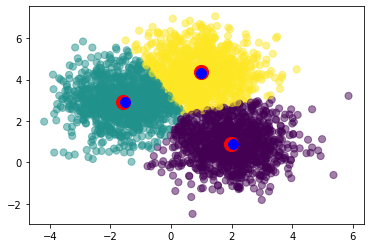

In [11]:
# print and plot out the cluster center and compare with built-in implementation
print(f"The cluster center for the first datapoint is : {centers1[y_kmeans1[0]]}")

print(f"The centers for the {k2} clusters are : ")
print(centers1)

#  plot datapoints according to their cluster labels
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans1, s=50, alpha=0.5, cmap='viridis')

#  plot cluster centers using color 'red'
plt.scatter(centers1[:, 0], centers1[:, 1], c='red', s=200);
#  plot true cluster centers using color 'blue'
plt.scatter(true_centers[:, 0], true_centers[:, 1], c='blue', s=100);

# Congrats!

Now you have seen how to implement K-means using built-in function/ from scratch. You can compare them by changing various parameters such as number of clusters. You can also plot the cost vs. train steps, or even try with your own dataset.